# IAS 150

### Imports

In [6]:
import pandas as pd
import numpy as np
import migrant_functions as mf
import qgrid as qg
import matplotlib.pyplot as plt
import jordan as j
import random

ModuleNotFoundError: No module named 'migrant_functions'

In [3]:
migrant_data = pd.read_csv('migrant_table_final.csv')

FileNotFoundError: File b'migrant_table_final.csv' does not exist

In [227]:
# either a bar graph or line graph
    # if bar, x = year, y=variable
    # if line, y=country, x=year

def multiple_pick_and_graph(migrant_data, variable, variable_type, immigration_type, interest_country_list, plot_type):
    selected_data = migrant_data.loc[(migrant_data[variable] == variable_type)
                                     & (migrant_data['Migration Type'] == immigration_type),:]
    picks = selected_data[['Country', 'Year', 'Total Migration']]
    
    if plot_type == 'line':
        
        plt.figure(figsize=(10,10))
    
        plt.style.use('seaborn-white')
#         my_dpi=96
#         plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

        region =['Cuba',
         'El Salvador',
         'Guatemala',
         'Honduras',
         'Mexico',
         'Venezuela (Bolivarian Republic of)']

        # multiple line plot
        country_list = list(np.unique(picks['Country']))
        end_values = []
        for country in country_list:
            country_picks = picks.loc[picks['Country'] == country,:]
            if country != interest_country_list[0]:
                plt.plot(country_picks['Year'].values, np.log(country_picks['Total Migration'].values), marker='', color='black', linewidth=1, alpha=0.4)
            else:
                end_value = picks.loc[picks['Country'] == country,:].values[6][2]
                plt.plot(country_picks['Year'].values, np.log(country_picks['Total Migration'].values), marker='', color='blue', linewidth=5, alpha=0.7)

        plt.xlim(1989, 2018);
        plt.ylim(7, 20);

        def rand_jitter(arr):
            stdev = .01*(max(arr)-min(arr))
            return arr + np.random.randn(len(arr)) * stdev



        plt.text(2019, np.log(end_value), interest_country_list[0], horizontalalignment='left', size='small', color='black')

        plt.title('Female' + ' ' + 'immigration ' + "For Each Country, by Year", loc='left', fontsize=12, fontweight=0, color='black');
        plt.xlabel("Year");
        plt.ylabel("log(Immigration)");
        plt.show()
        
    
    elif plot_type == 'bar': 
        
        plt.figure(figsize=(10,10))
        
        # set width of bar
        barWidth = 0.25

        # set height of bar
        bars = []
        for country in interest_country_list:            
            picks1 = picks.loc[picks['Country'] == country,:]
            bars1 = list(picks1.loc[:,'Total Migration'].values)
            bars.append(bars1)
        
        
        # Set position of bar on X axis
        current = np.arange(len(bars[0]))
        positions = [current]
        for bar in bars[1:]:
            r = [x + barWidth for x in current]
            positions.append(r)
            current = r

        #Make the plot
        for pos, bar, label in zip(positions, bars, interest_country_list):
            plt.bar(pos, bar, color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), width=barWidth, edgecolor='white', label=label)

        # Add xticks on the middle of the group bars
        plt.xlabel('group', fontweight='bold')
        plt.xticks([r + barWidth for r in range(len(bars[0]))], ['1990', '1995', '2000', 
                                                                 '2005', '2010', '2015', '2017'])

        # Create legend & Show graphic
        plt.legend()
        plt.show()

    else:
        print('Not a valid visulization!')
        
        
    

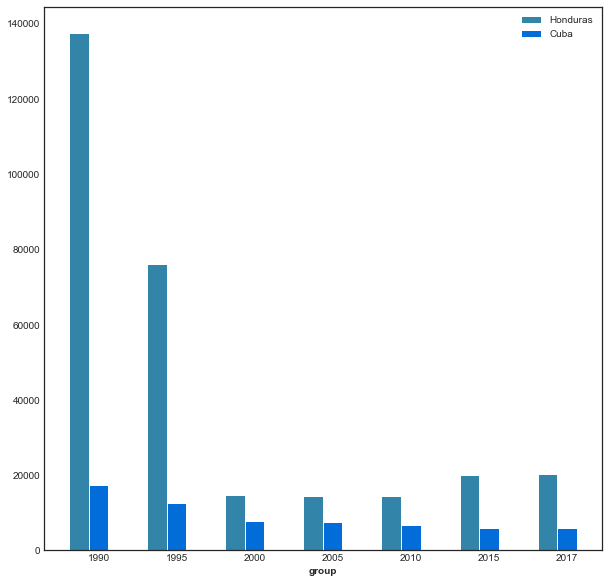

In [228]:
multiple_pick_and_graph(migrant_data, 'Gender', 'female', 'Immigration', ['Honduras', 'Cuba'], 'bar')

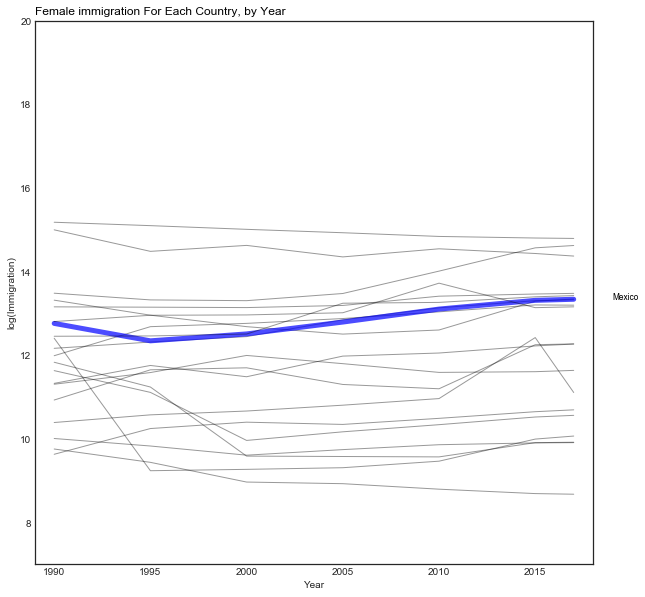

In [229]:
multiple_pick_and_graph(migrant_data, 'Gender', 'female', 'Immigration', ['Mexico'], 'line')

In [ ]:
def one_pick_and_graph(migration_type, interest_country):


    selected_data = migrant_data.loc[(migrant_data['Country'] == interest_country)
                                     & (migrant_data['Migration Type'] == migration_type),:]
                                     
    picks = selected_data[['Country', 'Year', 'Gender', 'Total Migration']]

        
    plt.figure(figsize=(10,10))
    
    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars = []
    for gender in ['female', 'male', 'total']:            
        picks1 = picks.loc[picks['Gender'] == gender,:]
        bars1 = list(picks1.loc[:,'Total Migration'].values)
        bars.append(bars1)
    
    
    # Set position of bar on X axis
    current = np.arange(len(bars[0]))
    positions = [current]
    for bar in bars[1:]:
        r = [x + barWidth for x in current]
        positions.append(r)
        current = r

    #Make the plot
    for pos, bar, label in zip(positions, bars, ['female', 'male', 'total']):
        plt.bar(pos, bar, color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)), width=barWidth, edgecolor='white', label=label)

    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars[0]))], ['1990', '1995', '2000', 
                                                             '2005', '2010', '2015', '2017'])

    # Create legend & Show graphic
    plt.legend()
    plt.show()